In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df.drop("User ID",axis=1, inplace=True)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]


In [26]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Checking if data is normalised or not



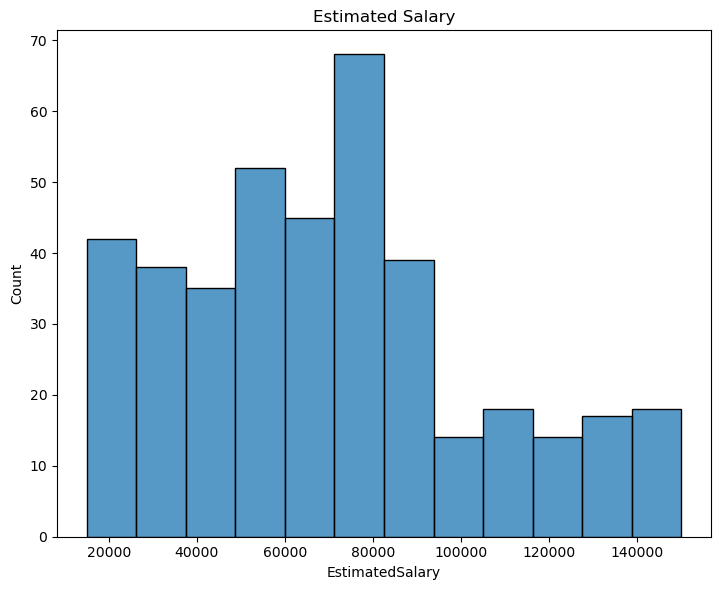

In [28]:
#Plotting Bar graphs for age and income column to check if it is normalised 
print("Checking if data is normalised or not\n")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(x=df["EstimatedSalary"])
plt.title("Estimated Salary")


plt.tight_layout()
plt.show()

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Age", "EstimatedSalary"]] = scaler.fit_transform(df[["Age", "EstimatedSalary"]])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import plot_tree  

clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,         
    random_state=42         
)


clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.875


In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 5, 23]])

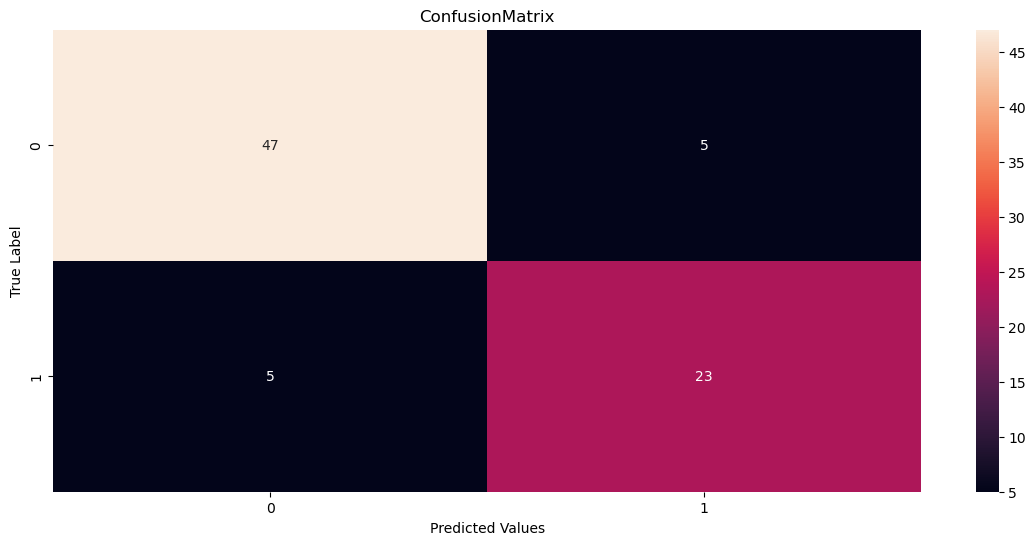

In [35]:
plt.figure(figsize = (14, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('ConfusionMatrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
clf_rep = classification_report(y_test, y_pred)
clf_rep

'              precision    recall  f1-score   support\n\n           0       0.90      0.90      0.90        52\n           1       0.82      0.82      0.82        28\n\n    accuracy                           0.88        80\n   macro avg       0.86      0.86      0.86        80\nweighted avg       0.88      0.88      0.88        80\n'

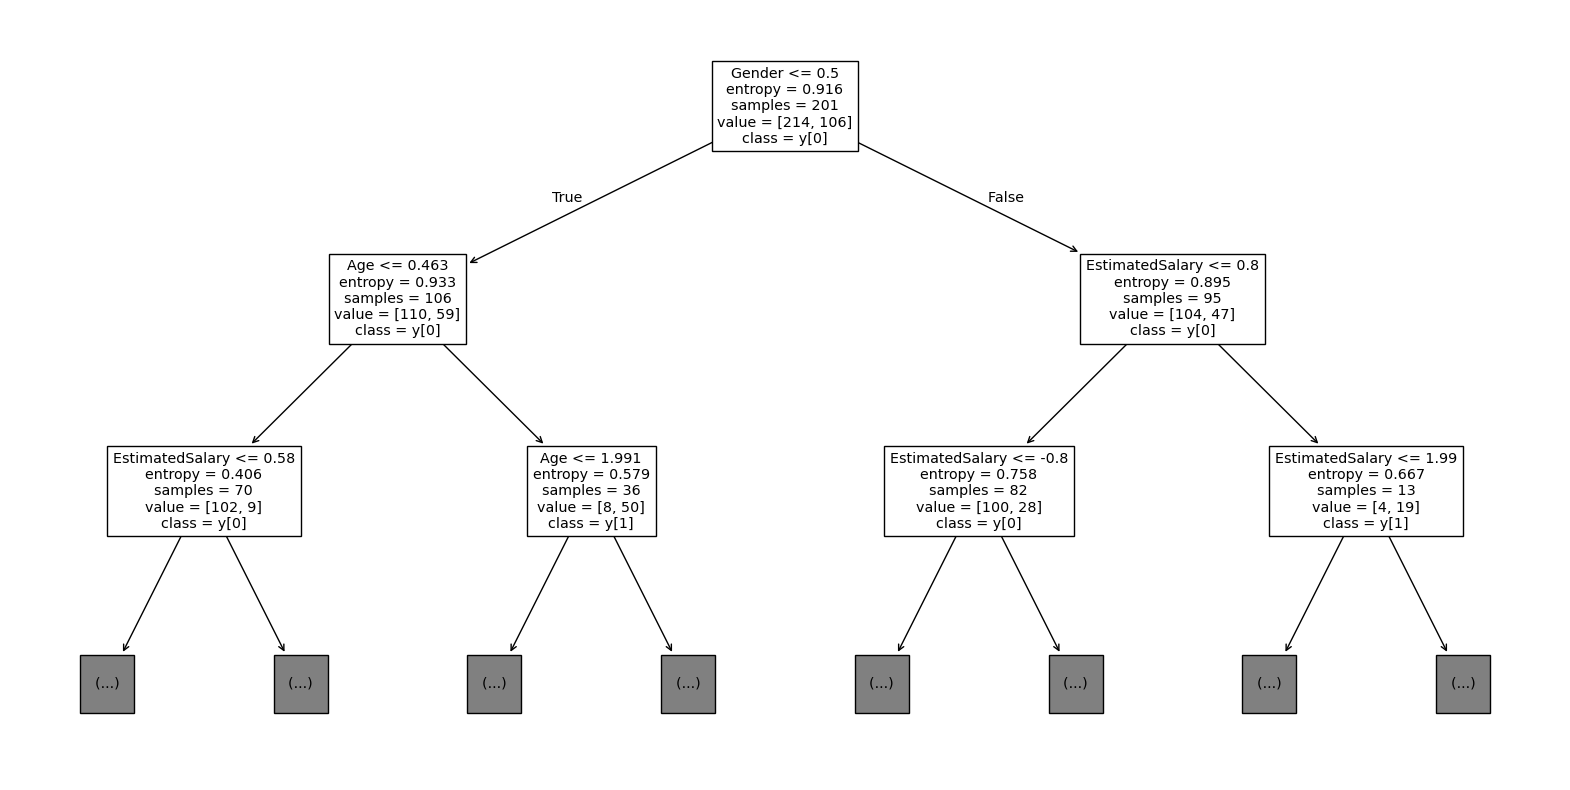

In [37]:
estimator = clf.estimators_[0] 

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X_train.columns, class_names=True , max_depth = 2)
plt.show()